In [ ]:
!gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz
!tar xzf CIFAR10.tar.gz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g
To: /content/CIFAR10.tar.gz
100% 19.8M/19.8M [00:00<00:00, 95.7MB/s]


Downloading dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


DATA_SET_PATH = './CIFAR10'
CLASSES = ['airplane', 'automobile', 'bird', 'cat']
    
INPUT_LAYER_SIZE = 1024
HIDDEN_LAYER_SIZE = 16
OUTPUT_LAYER_SIZE = len(CLASSES)
EPOCHS = 10
BATCH_SIZE = 20
LEARNING_RATE = 0.3

Importing numpy and matplotlib. <br/>
Defining hyperparameters and specifying dataset path.

In [ ]:
def show_image(img):
    plt.imshow(img)
    plt.show()
    

def rgb_to_grayscale(rgb):
    return np.uint8(np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]))


def read_image(file):
    return plt.imread(file)


def create_one_hot(arr):
    res = np.zeros((arr.size, arr.max() + 1))
    res[np.arange(arr.size), arr] = 1
    return res


def shuffle_data(data, labels):
    # Shuffling both of data and labels matrices in the same order
    indices = np.arange(len(data))
    np.random.shuffle(indices)
    return data[indices], labels[indices]


def read_data_set():
    from os import listdir
    
    train_data, train_data_labels = [], []
    test_data, test_data_labels = [], []
    
    for data_class in CLASSES:
        directory = '{}/train/{}/'.format(DATA_SET_PATH, data_class)
        for i in range(len(listdir(directory))):
            img = read_image('{}{}'.format(directory, '{}.jpg'.format(str(i).zfill(4))))
            train_data.append(img)
            train_data_labels.append(CLASSES.index(data_class))
    train_data_labels = create_one_hot(np.array(train_data_labels))
    
    for data_class in CLASSES:
        directory = '{}/test/{}/'.format(DATA_SET_PATH, data_class)
        for i in range(len(listdir(directory))):
            img = read_image('{}{}'.format(directory, '{}.jpg'.format(str(i).zfill(4))))
            test_data.append(img)
            test_data_labels.append(CLASSES.index(data_class))
    test_data_labels = create_one_hot(np.array(test_data_labels))

    # Showing two samples of the dataset
    show_image(train_data[0])
    show_image(test_data[0])
    
    # Converting rgb images to grayscale images
    grayscale_train_data = np.array([rgb_to_grayscale(img) for img in train_data])
    grayscale_test_data = np.array([rgb_to_grayscale(img) for img in test_data])
    
    # Normalizing grayscale images
    grayscale_train_data = grayscale_train_data / 255
    grayscale_test_data = grayscale_test_data / 255
    
    # Flatting normalized grayscale images
    grayscale_train_data = grayscale_train_data.reshape(-1, INPUT_LAYER_SIZE)
    grayscale_test_data = grayscale_test_data.reshape(-1, INPUT_LAYER_SIZE)
    
    # Shuffling data and labels
    grayscale_train_data, train_data_labels = shuffle_data(grayscale_train_data, train_data_labels)
    grayscale_test_data, test_data_labels = shuffle_data(grayscale_test_data, test_data_labels)
    
    return grayscale_train_data, train_data_labels, grayscale_test_data, test_data_labels

## First Part (Reading dataset)
Defining some useful functions for reading the data set and doing the preprocessing.

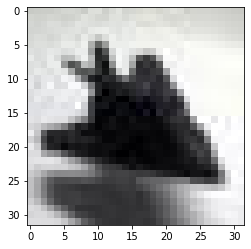

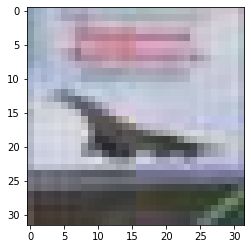

In [ ]:
# Reading the data set
train_data, train_data_labels, test_data, test_data_labels = read_data_set()

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def derivative_of_sigmoid(x):
    sig_x = sigmoid(x)
    return (1 - sig_x) * sig_x


def random_matrix_generator(rows, cols):
    return np.random.randn(rows, cols)


def zero_matrix_generator(rows, cols):
    return np.zeros((rows, cols))


def feed_forward(input_data, weights, biases):
    input_data = input_data.reshape(-1, 1)
    w0, w1, w2 = weights
    b0, b1, b2 = biases

    z1 = w0 @ input_data + b0
    a1 = sigmoid(z1).reshape(-1, 1)
    
    z2 = w1 @ a1 + b1
    a2 = sigmoid(z2).reshape(-1, 1)
    
    z3 = w2 @ a2 + b2
    a3 = sigmoid(z3).reshape(-1, 1)
    
    return (a1, a2, a3), (z1, z2, z3)

## Second Part (Feedforward)
Computing network output based on given input and parameters (weights and biases)

In [ ]:
def test_network(input_data, labels, weights=None, biases=None):
    correct_guesses = 0
    input_data_length = len(input_data)
    
    if weights == None:
      weights = (random_matrix_generator(HIDDEN_LAYER_SIZE, INPUT_LAYER_SIZE),
               random_matrix_generator(HIDDEN_LAYER_SIZE, HIDDEN_LAYER_SIZE),
               random_matrix_generator(OUTPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE))
    if biases == None:
      biases = (zero_matrix_generator(HIDDEN_LAYER_SIZE, 1),
              zero_matrix_generator(HIDDEN_LAYER_SIZE, 1),
              zero_matrix_generator(OUTPUT_LAYER_SIZE, 1))

    for i in range(input_data_length):
        actual_data, _ = feed_forward(input_data[i], weights, biases)
        actual_data = np.argmax(actual_data[-1])
        desired_data = np.argmax(labels[i])
        
        # Checking if the network's output is valid or not
        if actual_data == desired_data:
            correct_guesses += 1
    
    return correct_guesses / input_data_length

print('Testing network without training...')
print(f'Accuracy: {test_network(train_data[:200], train_data_labels[:200]) * 100}%')

Testing network without training...
Accuracy: 22.0%


## Third Part (Implementing network tutorial based on backpropagation)
Defining network training based on non-vectorized backpropagation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Epoch1: 54/200 = 27.0%
Epoch2: 53/200 = 26.5%
Epoch3: 46/200 = 23.0%
Epoch4: 40/200 = 20.0%
Epoch5: 43/200 = 21.5%
Epoch6: 43/200 = 21.5%
Epoch7: 45/200 = 22.5%
Epoch8: 45/200 = 22.5%
Epoch9: 47/200 = 23.5%
Epoch10: 53/200 = 26.5%

Training is finished...
Time taken for training: 151.24999117851257 seconds


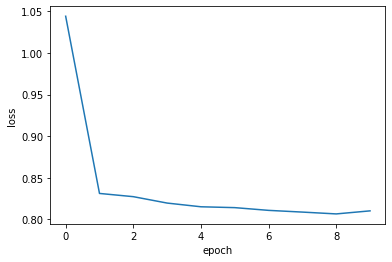

In [ ]:
def plot(x, y, x_label, y_label):
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


def cost_function(actual_data, desired_data):
    return np.sum(np.square(actual_data - desired_data))


def create_gradient_matrices():
    grad_w0 = zero_matrix_generator(HIDDEN_LAYER_SIZE, INPUT_LAYER_SIZE)
    grad_w1 = zero_matrix_generator(HIDDEN_LAYER_SIZE, HIDDEN_LAYER_SIZE)
    grad_w2 = zero_matrix_generator(OUTPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE)
    
    grad_a1 = zero_matrix_generator(HIDDEN_LAYER_SIZE, 1)
    grad_a2 = zero_matrix_generator(HIDDEN_LAYER_SIZE, 1)
    
    grad_b0 = zero_matrix_generator(HIDDEN_LAYER_SIZE, 1)
    grad_b1 = zero_matrix_generator(HIDDEN_LAYER_SIZE, 1)
    grad_b2 = zero_matrix_generator(OUTPUT_LAYER_SIZE, 1)
    
    grad_w = np.array([grad_w0, grad_w1, grad_w2])
    grad_b = np.array([grad_b0, grad_b1, grad_b2])
    grad_a = np.array([grad_a1, grad_a2])
    
    return grad_w, grad_b, grad_a


def backpropagation(data, data_label, w, z, a):
    data = data.reshape(-1, 1)
    data_label = data_label.reshape(-1, 1)
    
    grad_w, grad_b, grad_a = create_gradient_matrices()
    
    d_sig_z0 = derivative_of_sigmoid(z[0]).reshape(-1, 1)
    d_sig_z1 = derivative_of_sigmoid(z[1]).reshape(-1, 1)
    d_sig_z2 = derivative_of_sigmoid(z[2]).reshape(-1, 1)
    
    # Calculating gradients of parameters in the last layer
    for i in range(OUTPUT_LAYER_SIZE):
        for j in range(HIDDEN_LAYER_SIZE):
            grad_w[2][i][j] = 2 * (a[2][i] - data_label[i]) * d_sig_z2[i] * a[1][j]
            
    for i in range(OUTPUT_LAYER_SIZE):
        grad_b[2][i] = 2 * (a[2][i] - data_label[i]) * d_sig_z2[i]
        
    for i in range(HIDDEN_LAYER_SIZE):
        for j in range(OUTPUT_LAYER_SIZE):
            grad_a[1][i] += 2 * (a[2][j] - data_label[j]) * d_sig_z2[j] * w[2][j][i]
    
    # Calculating gradients of parameters in the second hidden layer      
    for i in range(HIDDEN_LAYER_SIZE):
        for j in range(HIDDEN_LAYER_SIZE):
            grad_w[1][i][j] = grad_a[1][i] * d_sig_z1[i] * a[0][j]
            
    for i in range(HIDDEN_LAYER_SIZE):
        grad_b[1][i] = grad_a[1][i] * d_sig_z1[i]
        
    for i in range(HIDDEN_LAYER_SIZE):
        for j in range(OUTPUT_LAYER_SIZE):
            grad_a[0][i] = w[1][j][i] * d_sig_z1[j] * grad_a[1][j]

    # Calculating gradients of parameters in the first hidden layer
    for i in range(HIDDEN_LAYER_SIZE):
        for j in range(INPUT_LAYER_SIZE):
            grad_w[0][i][j] = grad_a[0][i] * d_sig_z0[i] * data[j]
            
    for i in range(HIDDEN_LAYER_SIZE):
        grad_b[0][i] = grad_a[0][i] * d_sig_z0[i]
    
    return grad_w, grad_b, grad_a
  

def train_network(input_data, input_data_labels, weights, biases, backpropagation_method=backpropagation):
    w0, w1, w2 = weights
    b0, b1, b2 = biases

    import time
    start_time = time.time()

    avg_cost = []
    for epoch in range(EPOCHS):
        batches, batch_labels = shuffle_data(input_data, input_data_labels)
        batches = [batches[i:i + BATCH_SIZE] for i in range(0, len(batches), BATCH_SIZE)]
        batch_labels = [batch_labels[i:i + BATCH_SIZE] for i in range(0, len(batch_labels), BATCH_SIZE)]
        
        cost = 0
        correct_guesses = 0
        for batch, batch_label in zip(batches, batch_labels):
            grad_w, grad_b, grad_a = create_gradient_matrices()
            
            for image, image_label in zip(batch, batch_label):
                a, z = feed_forward(image, (w0, w1, w2), (b0, b1, b2))
                w = [w0, w1, w2]

                actual_data = np.argmax(a[-1])
                desired_data = np.argmax(image_label)
                cost += cost_function(a[-1], image_label.reshape(-1, 1))
                
                # Checking if the network's output is valid or not
                if actual_data == desired_data:
                    correct_guesses += 1

                grad_w_temp, grad_b_temp, grad_a_temp = backpropagation_method(image, image_label, w, z, a)

                grad_w += grad_w_temp
                grad_b += grad_b_temp
                grad_a += grad_a_temp
            
            # Updating the network's weights based on the average gradients
            w0 -= LEARNING_RATE * grad_w[0] / BATCH_SIZE
            w1 -= LEARNING_RATE * grad_w[1] / BATCH_SIZE
            w2 -= LEARNING_RATE * grad_w[2] / BATCH_SIZE
        
            # Updating the network's biases based on the average gradients
            b0 -= LEARNING_RATE * grad_b[0] / BATCH_SIZE
            b1 -= LEARNING_RATE * grad_b[1] / BATCH_SIZE
            b2 -= LEARNING_RATE * grad_b[2] / BATCH_SIZE
       
        avg_cost.append(cost / len(input_data))
        print(f'Epoch{epoch + 1}: {correct_guesses}/{len(input_data)} = {correct_guesses/len(input_data) * 100}%') 
    
    print('\nTraining is finished...')
    print(f'Time taken for training: {time.time() - start_time} seconds') 
    
    # Returning the trained parameters and also the average cost
    return (w0, w1, w2), (b0, b1, b2), avg_cost

EPOCHS = 10
BATCH_SIZE = 16

weights = (random_matrix_generator(HIDDEN_LAYER_SIZE, INPUT_LAYER_SIZE),
               random_matrix_generator(HIDDEN_LAYER_SIZE, HIDDEN_LAYER_SIZE),
               random_matrix_generator(OUTPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE))
biases = (zero_matrix_generator(HIDDEN_LAYER_SIZE, 1),
          zero_matrix_generator(HIDDEN_LAYER_SIZE, 1),
          zero_matrix_generator(OUTPUT_LAYER_SIZE, 1))

weights, biases, avg_costs = train_network(train_data[:200], train_data_labels[:200], 
                                            weights, biases, backpropagation_method=backpropagation)

plot(range(len(avg_costs)), avg_costs, 'epoch', 'loss') 

## Fourth Part (Vectorized backpropagation)
Implementing vectorized backpropagation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Epoch1: 53/200 = 26.5%
Epoch2: 46/200 = 23.0%
Epoch3: 50/200 = 25.0%
Epoch4: 50/200 = 25.0%
Epoch5: 65/200 = 32.5%
Epoch6: 64/200 = 32.0%
Epoch7: 65/200 = 32.5%
Epoch8: 71/200 = 35.5%
Epoch9: 72/200 = 36.0%
Epoch10: 72/200 = 36.0%

Training is finished...
Time taken for training: 0.7019782066345215 seconds


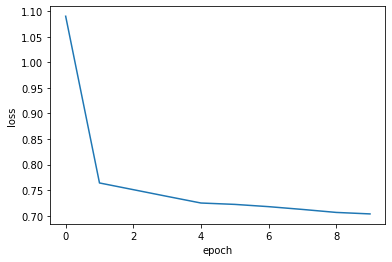

In [ ]:
def vectorized_backpropagation(data, data_label, w, z, a):
    data = data.reshape(-1, 1)
    data_label = data_label.reshape(-1, 1)
    
    grad_w, grad_b, grad_a = create_gradient_matrices()
    
    d_sig_z0 = derivative_of_sigmoid(z[0]).reshape(-1, 1)
    d_sig_z1 = derivative_of_sigmoid(z[1]).reshape(-1, 1)
    d_sig_z2 = derivative_of_sigmoid(z[2]).reshape(-1, 1)

    # Calculating gradients of parameters in the last layer
    grad_w[2] = 2 * d_sig_z2 * (a[2] - data_label) @ a[1].T
    grad_b[2] = 2 * d_sig_z2 * (a[2] - data_label)
    grad_a[1] = w[2].T @ (2 * d_sig_z2 * (a[2] - data_label))
    
    # Calculating gradients of parameters in the second hidden layer
    grad_w[1] = grad_a[1] * d_sig_z1 @ a[0].T
    grad_b[1] = grad_a[1] * d_sig_z1
    grad_a[0] = w[1].T @ grad_a[1] * d_sig_z1
    
    # Calculating gradients of parameters in the first hidden layer
    grad_w[0] = grad_a[0] * d_sig_z0 @ data.T
    grad_b[0] = grad_a[0] * d_sig_z0

    return grad_w, grad_b, grad_a

EPOCHS = 10
BATCH_SIZE = 16

weights = (random_matrix_generator(HIDDEN_LAYER_SIZE, INPUT_LAYER_SIZE),
               random_matrix_generator(HIDDEN_LAYER_SIZE, HIDDEN_LAYER_SIZE),
               random_matrix_generator(OUTPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE))
biases = (zero_matrix_generator(HIDDEN_LAYER_SIZE, 1),
          zero_matrix_generator(HIDDEN_LAYER_SIZE, 1),
          zero_matrix_generator(OUTPUT_LAYER_SIZE, 1))

weights, biases, avg_costs = train_network(train_data[:200], train_data_labels[:200], 
                                            weights, biases, backpropagation_method=vectorized_backpropagation)

plot(range(len(avg_costs)), avg_costs, 'epoch', 'loss')

We can see a HUGE difference for the time taken for training of the model based on vectorized and non-vectorized backpropagation.

Incrementing epochs and rerunning the model with vectorized backpropagation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Epoch1: 52/200 = 26.0%
Epoch2: 54/200 = 27.0%
Epoch3: 72/200 = 36.0%
Epoch4: 64/200 = 32.0%
Epoch5: 67/200 = 33.5%
Epoch6: 62/200 = 31.0%
Epoch7: 68/200 = 34.0%
Epoch8: 69/200 = 34.5%
Epoch9: 73/200 = 36.5%
Epoch10: 79/200 = 39.5%
Epoch11: 71/200 = 35.5%
Epoch12: 80/200 = 40.0%
Epoch13: 74/200 = 37.0%
Epoch14: 86/200 = 43.0%
Epoch15: 88/200 = 44.0%
Epoch16: 83/200 = 41.5%
Epoch17: 83/200 = 41.5%
Epoch18: 83/200 = 41.5%
Epoch19: 83/200 = 41.5%
Epoch20: 85/200 = 42.5%

Training is finished...
Time taken for training: 1.5076947212219238 seconds

Round 1 finished...
Testing Accuracy for Test Data: 34.625%

Epoch1: 81/200 = 40.5%
Epoch2: 82/200 = 41.0%
Epoch3: 85/200 = 42.5%
Epoch4: 82/200 = 41.0%
Epoch5: 87/200 = 43.5%
Epoch6: 84/200 = 42.0%
Epoch7: 88/200 = 44.0%
Epoch8: 82/200 = 41.0%
Epoch9: 80/200 = 40.0%
Epoch10: 85/200 = 42.5%
Epoch11: 84/200 = 42.0%
Epoch12: 89/200 = 44.5%
Epoch13: 90/200 = 45.0%
Epoch14: 93/200 = 46.5%
Epoch15: 94/200 = 47.0%
Epoch16: 96/200 = 48.0%
Epoch17: 91/200

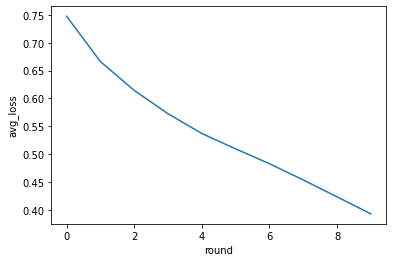

In [ ]:
EPOCHS = 20
BATCH_SIZE = 16

weights = (random_matrix_generator(HIDDEN_LAYER_SIZE, INPUT_LAYER_SIZE),
               random_matrix_generator(HIDDEN_LAYER_SIZE, HIDDEN_LAYER_SIZE),
               random_matrix_generator(OUTPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE))
biases = (zero_matrix_generator(HIDDEN_LAYER_SIZE, 1),
          zero_matrix_generator(HIDDEN_LAYER_SIZE, 1),
          zero_matrix_generator(OUTPUT_LAYER_SIZE, 1))

total_avg_cost = []
for i in range(10):
    weights, biases, avg_costs = train_network(train_data[:200], train_data_labels[:200], 
                                            weights, biases, backpropagation_method=vectorized_backpropagation)
    total_avg_cost.append(sum(avg_costs) / len(avg_costs))
    print(f'\nRound {i + 1} finished...')
    print(f'Testing Accuracy for Test Data: {test_network(test_data, test_data_labels, weights, biases) * 100}%\n')

plot(range(len(total_avg_cost)), total_avg_cost, 'round', 'avg_loss')

## Fifth Part (Testing the model)
Training the model with vectorized backpropagation and testing the trained network. (Using all the existing dataset) <br/>
***Important Note :*** Each round contains 10 epochs.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Epoch1: 7860/20000 = 39.300000000000004%
Epoch2: 9011/20000 = 45.055%
Epoch3: 9487/20000 = 47.435%
Epoch4: 9675/20000 = 48.375%
Epoch5: 9785/20000 = 48.925000000000004%
Epoch6: 9974/20000 = 49.87%
Epoch7: 10105/20000 = 50.525%
Epoch8: 10179/20000 = 50.895%
Epoch9: 10230/20000 = 51.15%
Epoch10: 10288/20000 = 51.44%
Epoch11: 10453/20000 = 52.26499999999999%
Epoch12: 10492/20000 = 52.459999999999994%
Epoch13: 10548/20000 = 52.739999999999995%
Epoch14: 10574/20000 = 52.87%
Epoch15: 10576/20000 = 52.88%
Epoch16: 10653/20000 = 53.26499999999999%
Epoch17: 10719/20000 = 53.595000000000006%
Epoch18: 10723/20000 = 53.615%
Epoch19: 10790/20000 = 53.949999999999996%
Epoch20: 10773/20000 = 53.864999999999995%
Epoch21: 10857/20000 = 54.285000000000004%
Epoch22: 10897/20000 = 54.48499999999999%
Epoch23: 10941/20000 = 54.705000000000005%
Epoch24: 11001/20000 = 55.005%
Epoch25: 10948/20000 = 54.74%
Epoch26: 11003/20000 = 55.015%
Epoch27: 11095/20000 = 55.474999999999994%
Epoch28: 10986/20000 = 54.93%
E

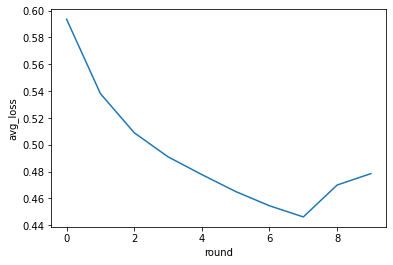

In [ ]:
EPOCHS = 40
BATCH_SIZE = 16

weights = (random_matrix_generator(HIDDEN_LAYER_SIZE, INPUT_LAYER_SIZE),
               random_matrix_generator(HIDDEN_LAYER_SIZE, HIDDEN_LAYER_SIZE),
               random_matrix_generator(OUTPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE))
biases = (zero_matrix_generator(HIDDEN_LAYER_SIZE, 1),
          zero_matrix_generator(HIDDEN_LAYER_SIZE, 1),
          zero_matrix_generator(OUTPUT_LAYER_SIZE, 1))

total_avg_cost = []
for i in range(10):
    weights, biases, avg_costs = train_network(train_data, train_data_labels, 
                                            weights, biases, backpropagation_method=vectorized_backpropagation)
    total_avg_cost.append(sum(avg_costs) / len(avg_costs))
    print(f'\nRound {i + 1} finished...')
    print(f'Testing Accuracy for Test Data: {test_network(test_data, test_data_labels, weights, biases) * 100}%\n')

plot(range(len(total_avg_cost)), total_avg_cost, 'round', 'avg_loss')

In [ ]:
print(f'Testing Accuracy: {test_network(test_data, test_data_labels, weights, biases) * 100}%')

Testing Accuracy: 52.675000000000004%


## Bonus Part
Creating a CNN using keras to solve the problem

In [ ]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, losses
from sklearn.metrics import f1_score, precision_score, recall_score


(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 3s 0us/step


Training without batch normalization.

In [ ]:
model = keras.Sequential([                      
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dense(64, kernel_initializer='he_uniform', activation='relu'),
    layers.Dense(10, kernel_initializer='he_uniform', activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), 
              metrics=[
                  'accuracy'
              ])

In [ ]:
history = model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
3125/3125 [==============================] - 74s 21ms/step - loss: 2.2488 - accuracy: 0.3795 - val_loss: 1.4986 - val_accuracy: 0.4588
Epoch 2/20
3125/3125 [==============================] - 66s 21ms/step - loss: 1.3847 - accuracy: 0.5029 - val_loss: 1.4840 - val_accuracy: 0.4934
Epoch 3/20
3125/3125 [==============================] - 66s 21ms/step - loss: 1.2184 - accuracy: 0.5714 - val_loss: 1.1541 - val_accuracy: 0.6074
Epoch 4/20
3125/3125 [==============================] - 66s 21ms/step - loss: 1.1243 - accuracy: 0.6112 - val_loss: 1.1975 - val_accuracy: 0.5993
Epoch 5/20
3125/3125 [==============================] - 67s 21ms/step - loss: 1.0480 - accuracy: 0.6418 - val_loss: 1.0459 - val_accuracy: 0.6523
Epoch 6/20
3125/3125 [==============================] - 66s 21ms/step - loss: 0.9765 - accuracy: 0.6671 - val_loss: 1.0192 - val_accuracy: 0.6529
Epoch 7/20
3125/3125 [==============================] - 66s 21ms/step - loss: 0.9282 - accuracy: 0.6840 - val_loss: 1.0621 -

In [ ]:
model = keras.Sequential([                      
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dense(64, kernel_initializer='he_uniform', activation='relu'),
    layers.Dense(10, kernel_initializer='he_uniform', activation='softmax')
])

model.summary()

After using batch normalization.

In [ ]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), 
              metrics=[
                  'accuracy'
              ])
history = model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
3125/3125 [==============================] - 77s 24ms/step - loss: 1.5289 - accuracy: 0.4483 - val_loss: 1.1457 - val_accuracy: 0.5966
Epoch 2/20
3125/3125 [==============================] - 75s 24ms/step - loss: 1.0084 - accuracy: 0.6498 - val_loss: 1.0018 - val_accuracy: 0.6536
Epoch 3/20
3125/3125 [==============================] - 77s 25ms/step - loss: 0.7845 - accuracy: 0.7339 - val_loss: 0.7117 - val_accuracy: 0.7573
Epoch 4/20
3125/3125 [==============================] - 75s 24ms/step - loss: 0.6491 - accuracy: 0.7797 - val_loss: 0.7239 - val_accuracy: 0.7550
Epoch 5/20
3125/3125 [==============================] - 75s 24ms/step - loss: 0.5481 - accuracy: 0.8140 - val_loss: 0.6554 - val_accuracy: 0.7809
Epoch 6/20
3125/3125 [==============================] - 75s 24ms/step - loss: 0.4728 - accuracy: 0.8430 - val_loss: 0.5966 - val_accuracy: 0.8011
Epoch 7/20
3125/3125 [==============================] - 75s 24ms/step - loss: 0.4066 - accuracy: 0.8641 - val_loss: 0.6269 -

Adding Dropout to the CNN.

In [ ]:
model = keras.Sequential([                      
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64, kernel_initializer='he_uniform', activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, kernel_initializer='he_uniform', activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)       

In [ ]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), 
              metrics=[
                  'accuracy'
              ])
history = model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


Showing Recall, Precision and F1 score

In [ ]:
prediction = model.predict(x_test, batch_size=32, verbose=1)
predicted = np.argmax(prediction, axis=1)

print(f'Precision: {precision_score(y_test, predicted, average="weighted")}')
print(f'Recall: {recall_score(y_test, predicted, average="weighted")}')
print(f'F1: {f1_score(y_test, predicted, average="weighted")}')

In [ ]:
for i in range(10):
  output = model.predict(np.array([x_test[i]]))
  print(i+1, ' : ', classes[np.argmax(output)])
  plt.imshow(x_test[i])